In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('task_5.csv')
print('Data is loaded successfully')
print(f'Shape of the data {df.shape}')
df.head(3)

Data is loaded successfully
Shape of the data (9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [4]:
print(f'{df.describe()}')
print('********************************************')
df.info()

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000
********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       

<h1>Checking for Null and Duplicates Values</h1>

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
print(sum(df.duplicated(subset = None, keep = 'first')))
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
print(f'Shape of the data after removing  {df.shape}')

17
Shape of the data after removing  (9977, 13)


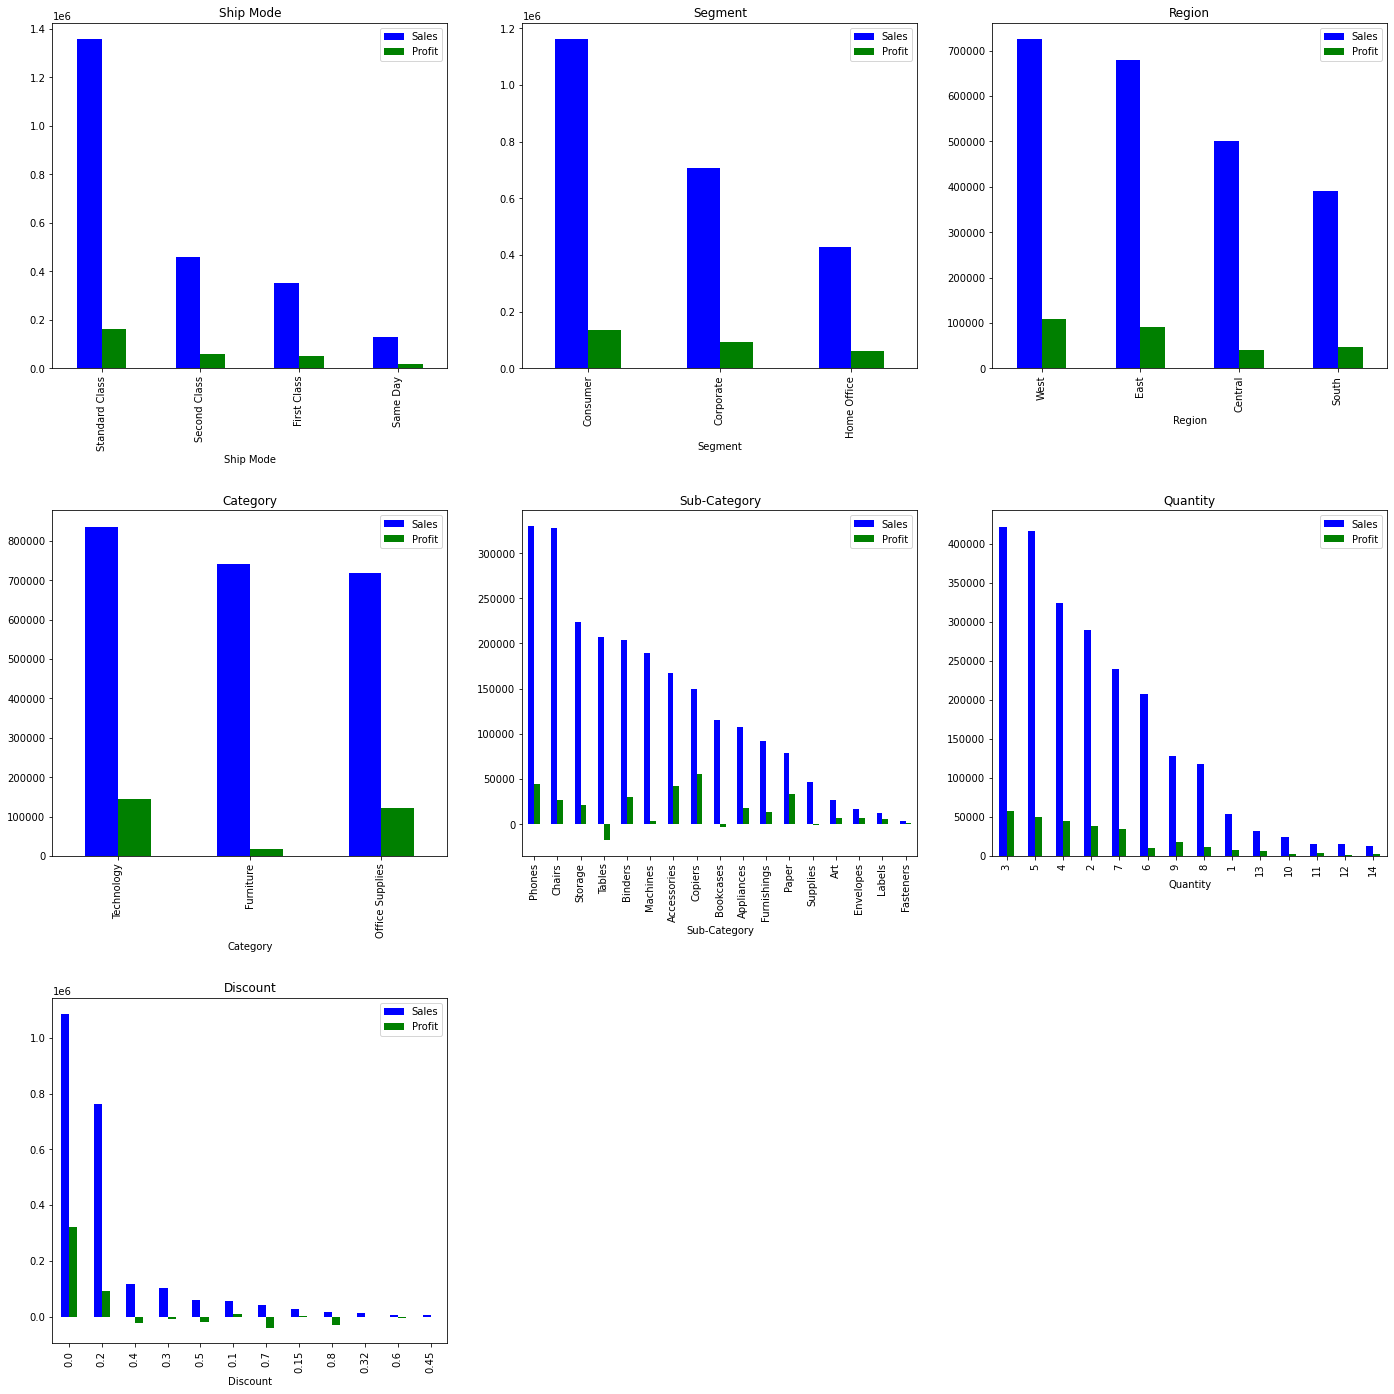

In [12]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]    
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)
    plt.tight_layout(pad = 3.0)
    plt.show()
    
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["blue", "green"]
getUnique(df, target_variable, sort_by, color, num_categories)

In [14]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

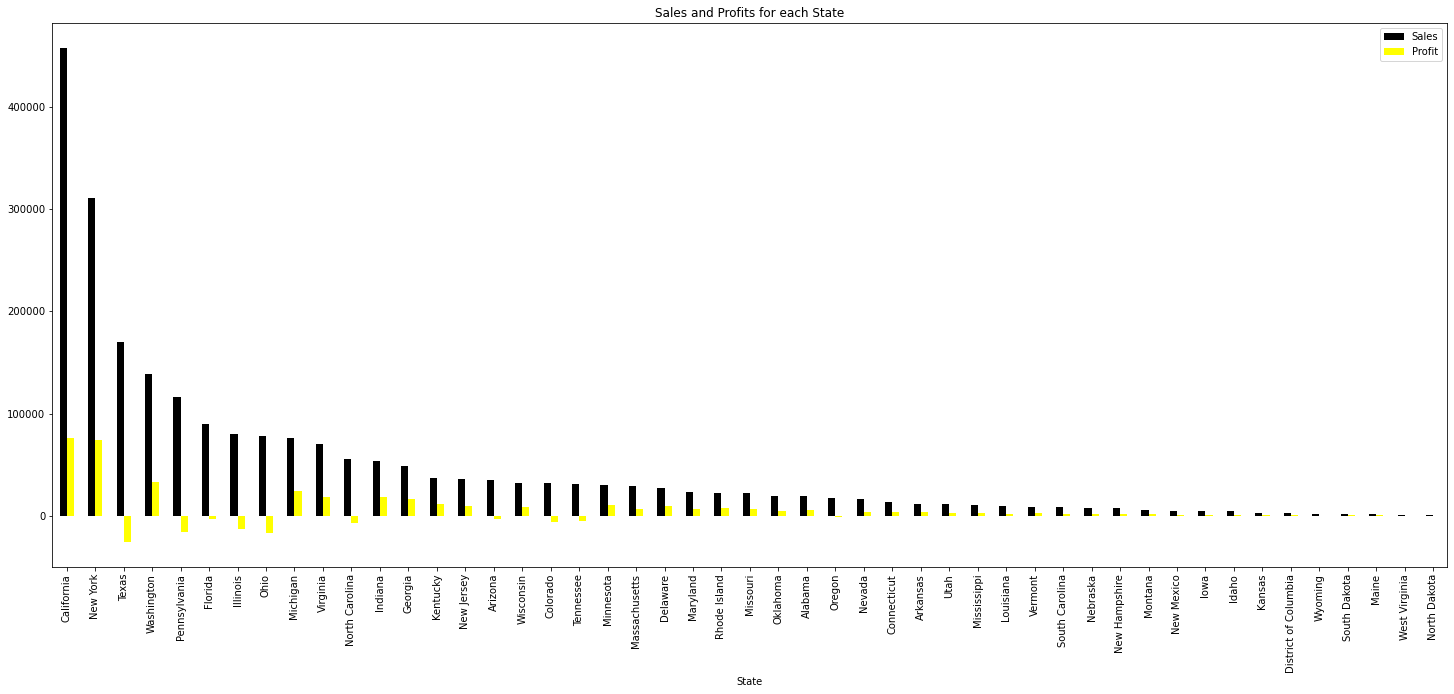

In [15]:
plt.rcParams["figure.figsize"] = [25,10]
df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["black", "yellow"])
plt.title("Sales and Profits for each State")
plt.show()

In [16]:
df.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

In [17]:
states_df = df.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70
Florida,89473.7080,-3399.3017,114.65
Illinois,80162.5370,-12601.6500,191.10
Ohio,77976.7640,-16959.3178,152.10
Michigan,75879.6440,24428.0903,1.80


In [18]:
states_df['Discount'][states_df['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

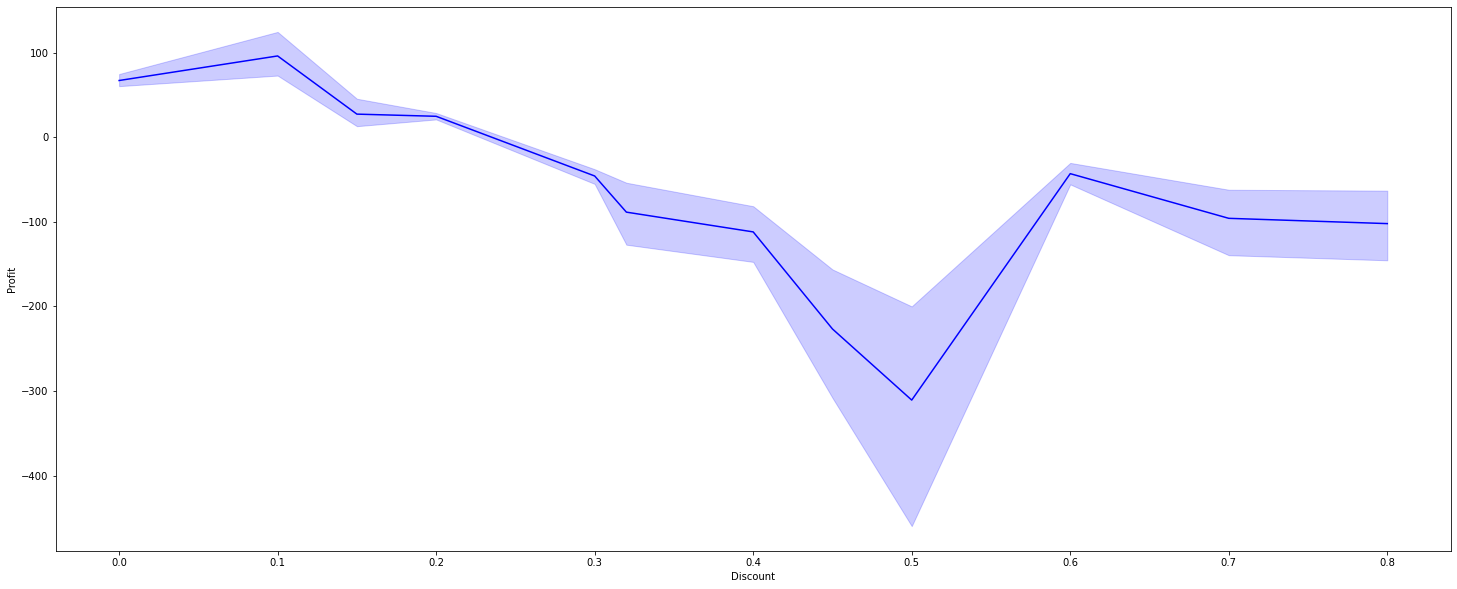

In [20]:
sns.lineplot(x = "Discount", y = "Profit", data = df, color = "blue")
plt.show()

<h1><center>Insights from Data after Analysing</center></h1>

<h5>The profit generated by Office supplies category is more, but the sales for office supplies are less. So, we have to work on increasing the sales for Office Supplies Category.</h5>
<h5>The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.</h5>
<h5>The company is facing Loss in top 25 states with highest number of sales.</h5>
<h5> The states with high Sales are generating less profit due to high discount allowance.</h5>
<h5>Discount is neagtively related to the Profit. This is be noted when a discount is being allowed on the products.</h5>